# 🏫 Previsão de Evasão Escolar 
## 📚 Importando bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown

## 📖 Lendo os arquivos csv
### `rend_escolas_2022`: 
#### 1. Convertendo aquivo no formato 'xlsx' para 'csv'.

In [2]:
read_file_rend_escolas_2022 = pd.read_excel('dados/tx_rend_escolas_2022.xlsx')

In [3]:
read_file_rend_escolas_2022.to_csv('dados/rend_escolas_2022.csv')

#### 2. Lendo o arquivo e mostrando as 5 primeiras linhas.

In [4]:
REND_BASICA_2022_PATH = 'dados/rend_escolas_2022.csv'
rend_escolas_2022_original_df = pd.read_csv(REND_BASICA_2022_PATH)
rend_escolas_2022_original_df.head(5)

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\1147842157.py:2: DtypeWarning: Columns (1,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  rend_escolas_2022_original_df = pd.read_csv(REND_BASICA_2022_PATH)


,Unnamed: 0.1,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,0,NaN,Instituto Nacional de Estudos e Pesquisas Educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Taxas de Rendimento Escolar (Aprovação, Reprov...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `microdados_ed_basica_2022`:
- Lendo o arquivo, alterando para `encoding=latin-1` e mostrando as 5 primeiras linhas.

In [5]:
ED_BASICA_2022_PATH = 'dados/microdados_ed_basica_2022.csv'
ed_basica_2022_original_df = pd.read_csv(ED_BASICA_2022_PATH, sep=';', encoding='latin-1')
ed_basica_2022_original_df.head(5)

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\1627271937.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  ed_basica_2022_original_df = pd.read_csv(ED_BASICA_2022_PATH, sep=';', encoding='latin-1')


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


## 🫧 Limpeza dos dados 
### `rend_escolas_2022`:
#### 1. Fazendo uma cópia do arquivo original para facilitar na produção do projeto. 
#### 2. Remoção de coluna extra de índice.

In [6]:
rend_escolas_2022_df = rend_escolas_2022_original_df.copy()

rend_escolas_2022_df = rend_escolas_2022_df.drop(columns=['Unnamed: 0.1']) 

#### 3. Alteração na nomeclatura das colunas usando os nomes presentes na linha 7.
#### 4. Remoção das primeiras e últimas linhas indesejadas.
#### 5. Resetar índices.

In [7]:
rend_escolas_2022_df.columns = rend_escolas_2022_df.iloc[7].values 

rend_escolas_2022_df = rend_escolas_2022_df.drop(rend_escolas_2022_df.index[:8]) 
rend_escolas_2022_df = rend_escolas_2022_df.drop(rend_escolas_2022_df.index[-2:])

rend_escolas_2022_df.reset_index(drop=True, inplace=True) 

#### 6. Retirada do ponto e retorno da parte anterior ao ponto no código das escolas, para esses dados ficarem no mesmo modelo em ambos dataframes.
#### 7. Conversão das colunas `3_CAT_FUN` e `3_CAT_MED` para valores numéricos e tornando NaN os dados que não são numéricos.
#### 8. Conversão das colunas `2_CAT_FUN` e `2_CAT_MED` para valores numéricos e tornando NaN os dados que não são numéricos.
#### 9. Descartando as linhas com NaN resultantes das conversões.
#### 10. Criação de duas novas colunas que irão receber a média entre as taxas de abandono e as taxas de reprovação do ensino fundamental e médio.

In [8]:
rend_escolas_2022_df['CO_ENTIDADE'] = rend_escolas_2022_df['CO_ENTIDADE'].astype(str).str.partition('.')[0] 

rend_escolas_2022_df['3_CAT_FUN'] = pd.to_numeric(rend_escolas_2022_df['3_CAT_FUN'], errors='coerce') # taxa de abandono ensino fundamental
rend_escolas_2022_df['3_CAT_MED'] = pd.to_numeric(rend_escolas_2022_df['3_CAT_MED'], errors='coerce') # taxa de abandono ensino médio

rend_escolas_2022_df['2_CAT_FUN'] = pd.to_numeric(rend_escolas_2022_df['2_CAT_FUN'], errors='coerce') # taxa de reprovação ensino fundamental
rend_escolas_2022_df['2_CAT_MED'] = pd.to_numeric(rend_escolas_2022_df['2_CAT_MED'], errors='coerce') # taxa de reprovação ensino médio

rend_escolas_2022_df.dropna(subset=['3_CAT_FUN', '3_CAT_MED', '2_CAT_FUN', '2_CAT_MED'], inplace=True)

rend_escolas_2022_df['taxa_de_abandono'] = round((rend_escolas_2022_df[['3_CAT_FUN', '3_CAT_MED']].mean(axis=1)), 2)
rend_escolas_2022_df['taxa_de_reprovacao'] = round((rend_escolas_2022_df[['2_CAT_FUN', '2_CAT_MED']].mean(axis=1)), 2)

#### 11. Seleção das colunas necessárias.
#### 12. Renomeação das colunas `CO_ENTIDADE` e `NO_REGIAO` para melhor compreensão.
#### 13. Verificação de dados nulos na coluna `taxa_de_abandono` e `taxa_de_reprovacao`.

In [9]:
rend_escolas_2022_df = rend_escolas_2022_df[['CO_ENTIDADE', 'NO_REGIAO', 'taxa_de_abandono', 'taxa_de_reprovacao']] 

rend_escolas_2022_df = rend_escolas_2022_df.rename(columns={'CO_ENTIDADE':'codigo_escola', 'NO_REGIAO': 'regiao'}) 

def verificar_dados_nulos(*colunas):
    for coluna in colunas:
        efetuacao_dados_nulos = rend_escolas_2022_df[coluna].isnull().sum()
        display(Markdown(f"### Quantidade de dados nulos na coluna **{coluna}**: **{efetuacao_dados_nulos}**"))
verificar_dados_nulos('taxa_de_abandono', 'taxa_de_reprovacao')

### Quantidade de dados nulos na coluna **taxa_de_abandono**: **0**

### Quantidade de dados nulos na coluna **taxa_de_reprovacao**: **0**

#### 14. Visualização dos dados. 

In [10]:
rend_escolas_2022_df

,codigo_escola,regiao,taxa_de_abandono,taxa_de_reprovacao
4,11024682,Norte,4.55,3.30
7,11024968,Norte,4.30,0.55
15,11025638,Norte,2.00,2.50
17,11037962,Norte,0.00,15.50
19,11038373,Norte,0.00,25.75
...,...,...,...,...
129281,53068068,Centro-Oeste,5.00,5.70
129293,53068181,Centro-Oeste,0.00,12.85
129300,53082001,Centro-Oeste,0.00,1.35
129304,53084055,Centro-Oeste,0.00,0.20


### `microdados_ed_basica_2022`:
#### 1. Fazendo uma cópia do arquivo original para facilitar na produção do projeto. 
#### 2. Transformação da coluna `CO_ENTIDADE` em string para se igualar ao outro dataframe. 

In [11]:
ed_basica_2022_df = ed_basica_2022_original_df.copy()

ed_basica_2022_df['CO_ENTIDADE'] = ed_basica_2022_df['CO_ENTIDADE'].astype(str)

#### 3. Selecão das colunas necessárias.
#### 4. Renomeação das colunas para melhor compreensão.
- Dicionário: Dados das colunas: `IN_AGUA_POTAVEL`, `IN_ENERGIA_REDE_PUBLICA`,
                                       `IN_ESGOTO_REDE_PUBLICA`, `IN_LIXO_SERVICO_COLETA`, `IN_BIBLIOTECA_SALA_LEITURA`, `IN_TRATAMENTO_LIXO_INEXISTENTE`, `IN_INTERNET`,
                                       `IN_COMPUTADOR`, `IN_LABORATORIO_CIENCIAS`, `IN_LABORATORIO_INFORMATICA`, `IN_ESP`, `IN_ALIMENTACAO`, `IN_ACESSIBILIDADE_INEXISTENTE` = 0 : não, 1: sim

In [12]:
ed_basica_2022_df = ed_basica_2022_df[['CO_ENTIDADE', 'NO_REGIAO', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_REDE_PUBLICA',
                                       'IN_ESGOTO_REDE_PUBLICA', 'IN_LIXO_SERVICO_COLETA', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_TRATAMENTO_LIXO_INEXISTENTE', 'IN_INTERNET',
                                       'IN_COMPUTADOR', 'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA', 'IN_LABORATORIO_CIENCIAS', 'TP_DEPENDENCIA', 'IN_LABORATORIO_INFORMATICA', 'IN_ESP', 'IN_ALIMENTACAO', 'IN_ACESSIBILIDADE_INEXISTENTE']]
ed_basica_2022_df = ed_basica_2022_df.rename(columns={'CO_ENTIDADE':'codigo_escola',
                                                      'NO_REGIAO': 'regiao',
                                                      'IN_TRATAMENTO_LIXO_INEXISTENTE': 'tratamento_de_lixo',
                                                      'IN_BIBLIOTECA_SALA_LEITURA': 'biblioteca_sala_leitura',
                                                      'IN_AGUA_POTAVEL':'agua_filtrada', 
                                                      'IN_ENERGIA_REDE_PUBLICA':'energia',
                                                      'IN_ESP': 'educacao_especial',
                                                      'IN_ESGOTO_REDE_PUBLICA':'saneamento_basico',
                                                      'IN_LIXO_SERVICO_COLETA':'coleta_de_lixo',
                                                      'TP_DEPENDENCIA': 'tipo_de_dependencia',
                                                      'IN_LABORATORIO_CIENCIAS': 'laboratorio_ciencias',
                                                      'IN_COMPUTADOR': 'computador',
                                                      'TP_LOCALIZACAO': 'tipo_localizacao', 
                                                      'TP_LOCALIZACAO_DIFERENCIADA': 'localizacao_diferenciada',
                                                      'IN_LABORATORIO_INFORMATICA': 'laboratorio_informatica',
                                                      'IN_INTERNET':'internet',
                                                      'IN_ALIMENTACAO':'alimentacao',
                                                      'IN_ACESSIBILIDADE_INEXISTENTE':'nenhuma_acessibilidade'})

ed_basica_2022_df

,codigo_escola,regiao,agua_filtrada,energia,saneamento_basico,coleta_de_lixo,biblioteca_sala_leitura,tratamento_de_lixo,internet,computador,tipo_localizacao,localizacao_diferenciada,laboratorio_ciencias,tipo_de_dependencia,laboratorio_informatica,educacao_especial,alimentacao,nenhuma_acessibilidade
0,11022558,Norte,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2.0,0.0,2,0.0,0.0,1.0,1.0
1,11024275,Norte,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0.0,1.0,2,1.0,1.0,1.0,0.0
2,11024291,Norte,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,1.0,1.0
3,11024372,Norte,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0.0,0.0,3,0.0,1.0,1.0,1.0
4,11024666,Norte,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,0.0,0.0,3,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224644,53086007,Centro-Oeste,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0.0,4,0.0,1.0,0.0,0.0
224645,53087003,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN
224646,53087011,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN
224647,53088000,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN


### Verificação se há códigos de escolas duplicadas

In [13]:
display(Markdown(f"#### Quantidade de códigos de escolas duplicados no dataframe `rend_escolas_2022_df`: {rend_escolas_2022_df['codigo_escola'].duplicated().sum()}"))
display(Markdown(f"#### Quantidade de códigos de escolas duplicados no dataframe `ed_basica_2022_df`: {ed_basica_2022_df['codigo_escola'].duplicated().sum()}"))

#### Quantidade de códigos de escolas duplicados no dataframe `rend_escolas_2022_df`: 0

#### Quantidade de códigos de escolas duplicados no dataframe `ed_basica_2022_df`: 0

## 🧱 Manipulação dos dados
#### 1. Mesclando um dataset com outro por meio de `outer` para mesclar dados que estão em ambos dataframes e não perder dados de escolas que estão presentes em apenas um dataframe.

In [14]:
ed_brasileira_2022 = rend_escolas_2022_df.merge(ed_basica_2022_df, how='outer', on='codigo_escola')
ed_brasileira_2022

,codigo_escola,regiao_x,taxa_de_abandono,taxa_de_reprovacao,regiao_y,agua_filtrada,energia,saneamento_basico,coleta_de_lixo,biblioteca_sala_leitura,...,internet,computador,tipo_localizacao,localizacao_diferenciada,laboratorio_ciencias,tipo_de_dependencia,laboratorio_informatica,educacao_especial,alimentacao,nenhuma_acessibilidade
0,11024682,Norte,4.55,3.30,Norte,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,0.0,2,1.0,1.0,1.0,0.0
1,11024968,Norte,4.30,0.55,Norte,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,2,1.0,1.0,1.0,0.0
2,11025638,Norte,2.00,2.50,Norte,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,2,1.0,1.0,1.0,0.0
3,11037962,Norte,0.00,15.50,Norte,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2,2.0,0.0,2,0.0,0.0,1.0,1.0
4,11038373,Norte,0.00,25.75,Norte,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,2,2.0,0.0,2,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224644,53085000,NaN,NaN,NaN,Centro-Oeste,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,4,1.0,1.0,0.0,0.0
224645,53087003,NaN,NaN,NaN,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN
224646,53087011,NaN,NaN,NaN,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN
224647,53088000,NaN,NaN,NaN,Centro-Oeste,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN


#### 2. Verificando a quantidade de dados nulos nas colunas. 

In [15]:
def verificar_dados_nulos(*colunas):
    for coluna in colunas:
        efetuacao_dados_nulos = ed_brasileira_2022[coluna].isnull().sum()
        nRows_ed_brasileira_2022 = ed_brasileira_2022.shape[0]
        porcentagem = round(efetuacao_dados_nulos * 100 / nRows_ed_brasileira_2022, 2)
        display(Markdown(f"### A quantidade de dados nulos na coluna `{coluna}` é **{efetuacao_dados_nulos}**, representando **{porcentagem}** % do dataset."))
    
verificar_dados_nulos('regiao_x', 'taxa_de_abandono', 'taxa_de_reprovacao', 'regiao_y', 'agua_filtrada', 'energia', 'saneamento_basico', 'coleta_de_lixo', 'internet', 'alimentacao', 'nenhuma_acessibilidade', 'biblioteca_sala_leitura', 'computador', 'tratamento_de_lixo', 'educacao_especial', 'laboratorio_ciencias', 'laboratorio_informatica', 'tipo_de_dependencia', 'tipo_localizacao', 'localizacao_diferenciada')

### A quantidade de dados nulos na coluna `regiao_x` é **203875**, representando **90.75** % do dataset.

### A quantidade de dados nulos na coluna `taxa_de_abandono` é **203875**, representando **90.75** % do dataset.

### A quantidade de dados nulos na coluna `taxa_de_reprovacao` é **203875**, representando **90.75** % do dataset.

### A quantidade de dados nulos na coluna `regiao_y` é **0**, representando **0.0** % do dataset.

### A quantidade de dados nulos na coluna `agua_filtrada` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `energia` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `saneamento_basico` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `coleta_de_lixo` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `internet` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `alimentacao` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `nenhuma_acessibilidade` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `biblioteca_sala_leitura` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `computador` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `tratamento_de_lixo` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `educacao_especial` é **46303**, representando **20.61** % do dataset.

### A quantidade de dados nulos na coluna `laboratorio_ciencias` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `laboratorio_informatica` é **44576**, representando **19.84** % do dataset.

### A quantidade de dados nulos na coluna `tipo_de_dependencia` é **0**, representando **0.0** % do dataset.

### A quantidade de dados nulos na coluna `tipo_localizacao` é **0**, representando **0.0** % do dataset.

### A quantidade de dados nulos na coluna `localizacao_diferenciada` é **44576**, representando **19.84** % do dataset.

#### 3. Como há grandes quantidades de dados nulos por causa de escolas que não estão em ambos datasets, há a deleção das linhas dessas escolas.

In [16]:
ed_brasileira_2022 = ed_brasileira_2022.dropna(subset=['taxa_de_abandono'])

ed_brasileira_2022

,codigo_escola,regiao_x,taxa_de_abandono,taxa_de_reprovacao,regiao_y,agua_filtrada,energia,saneamento_basico,coleta_de_lixo,biblioteca_sala_leitura,...,internet,computador,tipo_localizacao,localizacao_diferenciada,laboratorio_ciencias,tipo_de_dependencia,laboratorio_informatica,educacao_especial,alimentacao,nenhuma_acessibilidade
0,11024682,Norte,4.55,3.30,Norte,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,0.0,2,1.0,1.0,1.0,0.0
1,11024968,Norte,4.30,0.55,Norte,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,2,1.0,1.0,1.0,0.0
2,11025638,Norte,2.00,2.50,Norte,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,2,1.0,1.0,1.0,0.0
3,11037962,Norte,0.00,15.50,Norte,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2,2.0,0.0,2,0.0,0.0,1.0,1.0
4,11038373,Norte,0.00,25.75,Norte,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,2,2.0,0.0,2,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,53068068,Centro-Oeste,5.00,5.70,Centro-Oeste,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1,0.0,0.0,2,1.0,1.0,1.0,1.0
20770,53068181,Centro-Oeste,0.00,12.85,Centro-Oeste,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0.0,0.0,2,1.0,1.0,1.0,0.0
20771,53082001,Centro-Oeste,0.00,1.35,Centro-Oeste,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,4,1.0,1.0,0.0,0.0
20772,53084055,Centro-Oeste,0.00,0.20,Centro-Oeste,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1,0.0,1.0,4,1.0,1.0,0.0,0.0


#### 4. Verificando se as regiões são as mesmas de um dataframe e outro.

In [17]:
mesma_regiao = ed_brasileira_2022['regiao_x'] == ed_brasileira_2022['regiao_y']
todas_escolas_datasets_mesma_regiao = mesma_regiao.all()
display(Markdown(f"#### Todos os valores de `regiao_x` e `regiao_y` são os mesmos em ambos os datasets? {todas_escolas_datasets_mesma_regiao}"))

#### Todos os valores de `regiao_x` e `regiao_y` são os mesmos em ambos os datasets? True

#### 5. Se todas as regiões forem as mesmas de um dataframe e outro, é deletado a `regiao_y` e a coluna `regiao_x` é renomeado para `regiao`.
#### 6. Verificação dos dados únicos de regiões. 
#### 7. Uso da função `pd.factorize()` que identifica valores distintos na coluna e atribui um valor numérico para cada um.
- Reatribuindo a coluna `regiao` com os valores numéricos codificados pela função.
- Visualização do mapeamento usando `zip()` para combinar os valores originais e os valores numéricos em pares e logo depois transformando em `list()` para facilitar na visualização. 
#### 8. Caso as regiões não sejam as mesmas, apresentação de uma mensagem notificando isso.

In [18]:
if todas_escolas_datasets_mesma_regiao:
    ed_brasileira_2022.drop('regiao_y', axis=1, inplace=True)
    ed_brasileira_2022.rename(columns={'regiao_x': 'regiao'}, inplace=True)
    
    unique_regions = ed_brasileira_2022['regiao'].unique()
    display(Markdown(f"#### Regiões únicas: **{unique_regions}**"))
    
    ed_brasileira_2022['regiao'], unique = pd.factorize(ed_brasileira_2022['regiao'])
    display(Markdown(f"#### Mapeamento de código por região: **{list(zip(unique, ed_brasileira_2022['regiao'].unique()))}**"))
    
else:
    display(Markdown(f"#### As regiões em 'regiao_x' e 'regiao_y' não são as mesmas em todas as linhas."))

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\1442270564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_brasileira_2022.drop('regiao_y', axis=1, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\1442270564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_brasileira_2022.rename(columns={'regiao_x': 'regiao'}, inplace=True)


#### Regiões únicas: **['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']**

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\1442270564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_brasileira_2022['regiao'], unique = pd.factorize(ed_brasileira_2022['regiao'])


#### Mapeamento de código por região: **[('Norte', 0), ('Nordeste', 1), ('Sudeste', 2), ('Sul', 3), ('Centro-Oeste', 4)]**

#### 9. Cálculo do IQR para análise da presença de outliers. 
- Dividindo os dados da coluna `taxa_de_abandono` em primeiro (25%) e terceiro quartil (75%). 
- Cálculo do Intervalo Interquartílico (IQR) para medir a dispersão estatística dos dados.
- Definindo o limite inferior e superior. 

In [19]:
Q1 = ed_brasileira_2022['taxa_de_abandono'].quantile(0.25)
Q3 = ed_brasileira_2022['taxa_de_abandono'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#### 10. Plotagem dos gráficos para análise do dataframe com outliers e sem.
#### 11. Filtração de dados da coluna `taxa_de_abandono` para manter apenas os dados dentro dos limites definidos, removendo assim os outliers. 

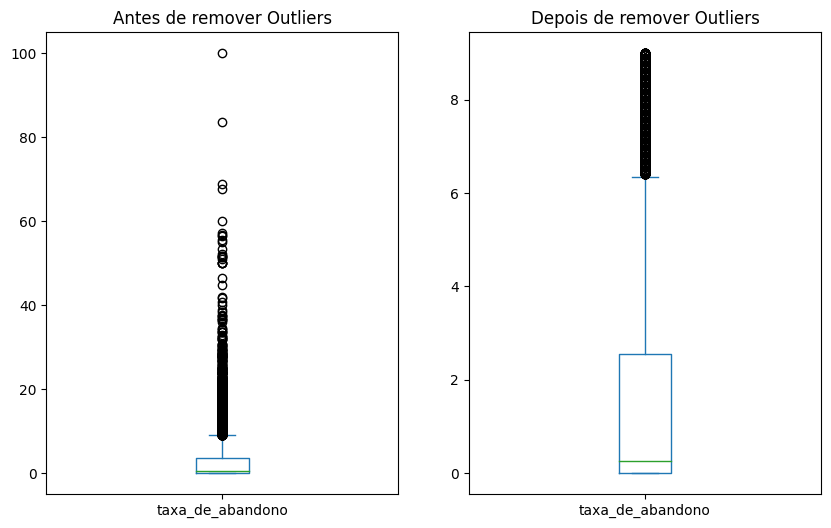

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
ed_brasileira_2022['taxa_de_abandono'].plot(kind='box')
plt.title('Antes de remover Outliers')

ed_brasileira_2022 = ed_brasileira_2022[(ed_brasileira_2022['taxa_de_abandono'] >= limite_inferior) & (ed_brasileira_2022['taxa_de_abandono'] <= limite_superior)]

plt.subplot(1, 2, 2)
ed_brasileira_2022['taxa_de_abandono'].plot(kind='box')
plt.title('Depois de remover Outliers')

plt.show()

#### 12. Apresentação da quantidade de linhas sem outliers. 

In [21]:
display(Markdown(f"#### Quantidade de linhas sem a presença de outliers: **{ed_brasileira_2022.shape[0]}**"))

#### Quantidade de linhas sem a presença de outliers: **19196**

#### 13. Plotagem do gráfico com a distribuição 

In [22]:
def plotar_distribuicao_de_coluna_continua(df, coluna_label, titulo, x_label):
    plt.hist(df[coluna_label], bins=30, alpha=0.75)
    plt.title(titulo)
    plt.xlabel(x_label)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

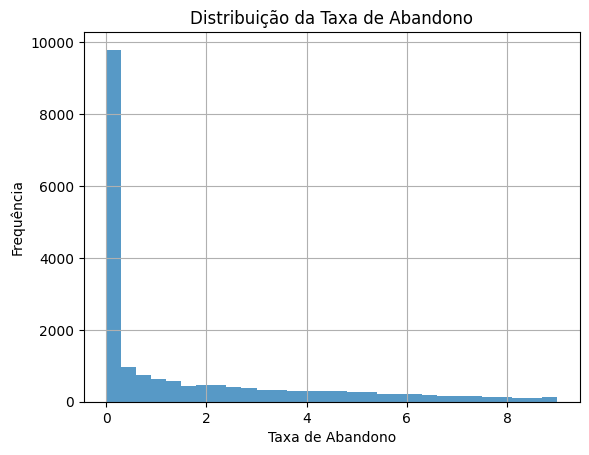

In [23]:
plotar_distribuicao_de_coluna_continua(ed_brasileira_2022, 'taxa_de_abandono', 'Distribuição da Taxa de Abandono', 'Taxa de Abandono')

#### 14. Criação de um dataframe com escolas com taxa == 0 
#### 15. Contagem de escolas com taxa == 0 

In [24]:
def apresentar_quantidade_de_zeros_na_coluna(df, coluna_label, metrica):
    zero_abandono_df = df[df['taxa_de_abandono'] == 0.0]

    quantidade_zero = zero_abandono_df.shape[0]
    porcentagem_quantidade_zero = round(quantidade_zero * 100 / df.shape[0], 2)
    display(Markdown(f"#### Quantidade de escolas com taxa de {metrica} 0.0: **{quantidade_zero}**, com a porcentagem de **{porcentagem_quantidade_zero}**"))

In [25]:
apresentar_quantidade_de_zeros_na_coluna(ed_brasileira_2022, 'taxa_de_abandono', 'abandono')

#### Quantidade de escolas com taxa de abandono 0.0: **8919**, com a porcentagem de **46.46**

#### 16. Criando um subconjunto em que a taxa seja supeior a 0.
#### 17. Definindo limiares para categorizar as taxas.
- Dividindo entre limiar médio

In [26]:
def definir_limiares_para_categorizar_coluna(df, coluna_label):
    dados_maiores_que_zero = df[df[coluna_label] > 0.000]

    limiar_medio = dados_maiores_que_zero[coluna_label].quantile(0.07) 

    display(Markdown(f"#### Limiar baixo: **{limiar_medio}**, Limiar alto: **{limiar_medio}**"))
    
    return limiar_medio

In [27]:
limiar_medio = definir_limiares_para_categorizar_coluna(ed_brasileira_2022, 'taxa_de_abandono')

#### Limiar baixo: **0.25**, Limiar alto: **0.25**

#### 18. Função que categoriza os valores das taxas para:
- Evasão Baixa: Quando a taxa não excede o limiar_medio.
- Evasão Alta: Quando a taxa excede o limiar_medio.
#### 19. Aplicação das categorizações na coluna, substituindo os dados pelas categorias correspondentes. 
#### 20. Visualização das categorias na coluna.

In [28]:
def categorizar_coluna(df, coluna_label, mapeamento, limiar_medio):
    def categorizar_valor(valor):
        if valor <= limiar_medio:
            return mapeamento['BAIXO']
        else:
            return mapeamento['ALTO']

    df[coluna_label] = df[coluna_label].apply(categorizar_valor)
    display(Markdown(f'#### {df[coluna_label].unique()}'))

In [29]:
categorizar_coluna(ed_brasileira_2022, 'taxa_de_abandono', {'BAIXO': 'Evasão Baixa', 'ALTO': 'Evasão Alta'}, limiar_medio)

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\3203363023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_label] = df[coluna_label].apply(categorizar_valor)


#### ['Evasão Alta' 'Evasão Baixa']

#### 21. Contagem de categorias presentes na coluna e a plotagem de um gráfico de pizza para melhor visualização.

In [30]:
def plotar_grafico_de_piza_com_categorias(df, coluna_label, titulo):
    categoria_counts = df[coluna_label].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.axis('equal')  
    plt.show()

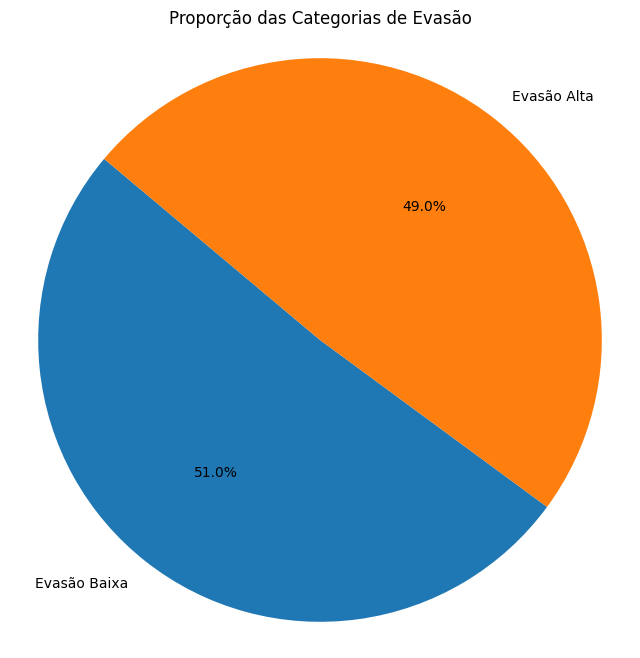

In [31]:
plotar_grafico_de_piza_com_categorias(ed_brasileira_2022, 'taxa_de_abandono', 'Proporção das Categorias de Evasão')

#### 22. Uso da função `pd.factorize()` que identifica valores distintos na coluna e atribui um valor numérico para cada um.
- Reatribuindo a coluna com os valores numéricos codificados pela função.
- Visualização do mapeamento usando `zip()` para combinar os valores originais e os valores numéricos em pares e logo depois transformando em `list()` para facilitar na visualização. 

In [32]:
def codificar_categorias(df, coluna_label, texto_coluna):
    df[coluna_label], unique = pd.factorize(df[coluna_label])
    display(Markdown(f"#### Mapeamento de {texto_coluna}: **{list(zip(unique, ed_brasileira_2022[coluna_label].unique()))}**"))

In [33]:
codificar_categorias(ed_brasileira_2022, 'taxa_de_abandono', 'taxa de abandono')

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\2055680165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_label], unique = pd.factorize(df[coluna_label])


#### Mapeamento de taxa de abandono: **[('Evasão Alta', 0), ('Evasão Baixa', 1)]**

#### 23. Fazendo o mesmo processo para a coluna `taxa_de_reprovacao`

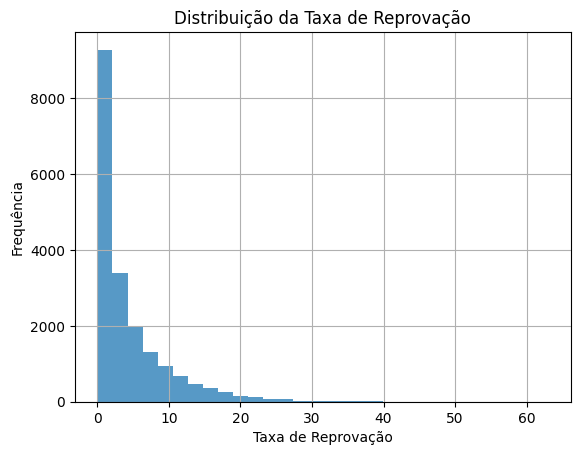

In [34]:
plotar_distribuicao_de_coluna_continua(ed_brasileira_2022, 'taxa_de_reprovacao', 'Distribuição da Taxa de Reprovação', 'Taxa de Reprovação')

In [35]:
def definir_limiares_para_categorizar_coluna(df, coluna_label):
    dados_maiores_que_zero = df[df[coluna_label] > 0.000]

    limiar_medio = dados_maiores_que_zero[coluna_label].quantile(0.4) 

    display(Markdown(f"#### Limiar baixo: **{limiar_medio}**, Limiar alto: **{limiar_medio}**"))
    
    return limiar_medio
limiar_medio = definir_limiares_para_categorizar_coluna(ed_brasileira_2022, 'taxa_de_reprovacao')

#### Limiar baixo: **2.2**, Limiar alto: **2.2**

In [36]:
categorizar_coluna(ed_brasileira_2022, 'taxa_de_reprovacao', { 'BAIXO': 'Reprovação Baixa', 'ALTO': 'Reprovação Alta'}, limiar_medio)

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\3203363023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_label] = df[coluna_label].apply(categorizar_valor)


#### ['Reprovação Alta' 'Reprovação Baixa']

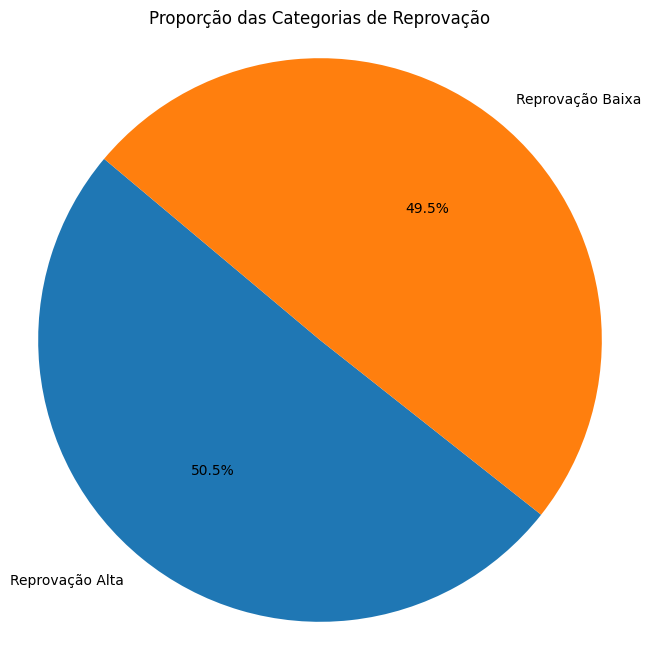

In [37]:
plotar_grafico_de_piza_com_categorias(ed_brasileira_2022, 'taxa_de_reprovacao', 'Proporção das Categorias de Reprovação')

In [38]:
codificar_categorias(ed_brasileira_2022, 'taxa_de_reprovacao', 'taxa de reprovação')

C:\Users\gabri\AppData\Local\Temp\ipykernel_27408\2055680165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_label], unique = pd.factorize(df[coluna_label])


#### Mapeamento de taxa de reprovação: **[('Reprovação Alta', 0), ('Reprovação Baixa', 1)]**

#### 24. Criação do arquivo csv com os dados manipulados.

In [39]:
ed_brasileira_2022.to_csv('dados/ed_brasileira_2022.csv')